## Syntactic Parsing
https://nlp100.github.io/en/ch05.html

The zip archive ai.en.zip contains the text of the Wikipedia article, "Artificial Intelligence". Apply a dependency parser to the text, and store the result in a file. Implement programs that read the dependency trees and perform the jobs.

For your convenience, the zip archive also includes ai.en.txt.json, the text with dependency trees predicted by Stanford CoreNLP and stored in JSON format.

In [42]:
# https://stanfordnlp.github.io/stanza/depparse.html
import stanza

nlp = stanza.Pipeline('en', verbose=False, processors='tokenize,pos,lemma,depparse')

with open('ai.en/ai.en.txt') as file:
    for line in file:
        if line == '\n':
            continue
        doc = nlp(line)
        print(doc) # 同様の解析結果が出ている
        break

[
  [
    {
      "id": 1,
      "text": "In",
      "lemma": "in",
      "upos": "ADP",
      "xpos": "IN",
      "head": 3,
      "deprel": "case",
      "start_char": 0,
      "end_char": 2
    },
    {
      "id": 2,
      "text": "computer",
      "lemma": "computer",
      "upos": "NOUN",
      "xpos": "NN",
      "feats": "Number=Sing",
      "head": 3,
      "deprel": "compound",
      "start_char": 3,
      "end_char": 11
    },
    {
      "id": 3,
      "text": "science",
      "lemma": "science",
      "upos": "NOUN",
      "xpos": "NN",
      "feats": "Number=Sing",
      "head": 17,
      "deprel": "obl",
      "start_char": 12,
      "end_char": 19
    },
    {
      "id": 4,
      "text": ",",
      "lemma": ",",
      "upos": "PUNCT",
      "xpos": ",",
      "head": 17,
      "deprel": "punct",
      "start_char": 19,
      "end_char": 20
    },
    {
      "id": 5,
      "text": "artificial",
      "lemma": "artificial",
      "upos": "ADJ",
      "xpos": "JJ",
     

### 40. Read the parse result (words)
Design a class Word that represents a word. This class has three member variables, text (word surface), lemma (lemma), and pos (part-of-speech). Represent a sentence as an array of instances of Word class. Implement a program to load the parse result, and store the text as an array of sentences. Show the object of the first sentence of the body of the article.

In [14]:
class Word:
    def __init__(self, token):
        self.text = token['originalText']
        self.lemma = token['lemma']
        self.pos = token['pos']

    def __repr__(self):
        return f'text: {self.text}, lemma: {self.lemma}, pos: {self.pos}'

In [15]:
import json

def read_text():
    with open('ai.en/ai.en.txt.json') as file:
        text = json.load(file)
        res = []
        for sent in text['sentences']:
            words = []
            for token in sent['tokens']:
                words.append(Word(token))
            res.append(words)
        return res
            
read_text()[0]

[text: In, lemma: in, pos: IN,
 text: computer, lemma: computer, pos: NN,
 text: science, lemma: science, pos: NN,
 text: ,, lemma: ,, pos: ,,
 text: artificial, lemma: artificial, pos: JJ,
 text: intelligence, lemma: intelligence, pos: NN,
 text: (, lemma: -lrb-, pos: -LRB-,
 text: AI, lemma: ai, pos: NN,
 text: ), lemma: -rrb-, pos: -RRB-,
 text: ,, lemma: ,, pos: ,,
 text: sometimes, lemma: sometimes, pos: RB,
 text: called, lemma: call, pos: VBN,
 text: machine, lemma: machine, pos: NN,
 text: intelligence, lemma: intelligence, pos: NN,
 text: ,, lemma: ,, pos: ,,
 text: is, lemma: be, pos: VBZ,
 text: intelligence, lemma: intelligence, pos: NN,
 text: demonstrated, lemma: demonstrate, pos: VBN,
 text: by, lemma: by, pos: IN,
 text: machines, lemma: machine, pos: NNS,
 text: ,, lemma: ,, pos: ,,
 text: in, lemma: in, pos: IN,
 text: contrast, lemma: contrast, pos: NN,
 text: to, lemma: to, pos: TO,
 text: the, lemma: the, pos: DT,
 text: natural, lemma: natural, pos: JJ,
 text: int

### 41. Read the parse result (dependency)
In addition to problem 40, add three member variables head (a reference to the object of its syntactic governor), dep (dependency type to its governor), and children (a list of references to the syntactic dependents in the parse tree) to the class Word. Show the pairs of governors (parents) and their dependents (children) of the first sentence of the body of the article. Use the class Word in the rest of the problems in this chapter.

In [17]:
class Word:
    def __init__(self, token: dict):
        self.text: str = token['originalText']
        self.lemma: str = token['lemma']
        self.pos: str = token['pos']
        self.head: Word  # the governer
        self.dep: str  # dependency type to the governer
        self.children: list[Word] = []
        self.idx: int = token['index'] # Needed for the question 44

    def __repr__(self):
        return f'Word(text={self.text}, idx={self.idx})'

In [18]:
import json

def read_text():
    with open('ai.en/ai.en.txt.json') as file:
        text: dict = json.load(file)
        res: list = []
        for sent in text['sentences']:
            words: list[Word] = [Word({'originalText': 'ROOT', 'lemma': 'ROOT', 'pos': 'ROOT', 'index': 0})]
            for token in sent['tokens']:
                words.append(Word(token))
            for depend in sent['basicDependencies']:
                relate(words[depend['governor']], words[depend['dependent']], depend['dep'])
            res.append(words)

        return res

def relate(parent: Word, child: Word, dep_type: str):
    parent.children.append(child)
    child.head = parent
    child.dep = dep_type

read_text()[0][:5]

[Word(text=ROOT, idx=0),
 Word(text=In, idx=1),
 Word(text=computer, idx=2),
 Word(text=science, idx=3),
 Word(text=,, idx=4)]

In [19]:
def show_pairs(sent_i: int):
    print('# Note: "←" stands for "is governed by"')
    for word in read_text()[sent_i]:
        if word.text == 'ROOT':
            continue
        print(f'{word} ← {word.head}')

show_pairs(0)

# Note: "←" stands for "is governed by"
Word(text=In, idx=1) ← Word(text=science, idx=3)
Word(text=computer, idx=2) ← Word(text=science, idx=3)
Word(text=science, idx=3) ← Word(text=called, idx=12)
Word(text=,, idx=4) ← Word(text=called, idx=12)
Word(text=artificial, idx=5) ← Word(text=intelligence, idx=6)
Word(text=intelligence, idx=6) ← Word(text=called, idx=12)
Word(text=(, idx=7) ← Word(text=AI, idx=8)
Word(text=AI, idx=8) ← Word(text=intelligence, idx=6)
Word(text=), idx=9) ← Word(text=AI, idx=8)
Word(text=,, idx=10) ← Word(text=intelligence, idx=6)
Word(text=sometimes, idx=11) ← Word(text=called, idx=12)
Word(text=called, idx=12) ← Word(text=ROOT, idx=0)
Word(text=machine, idx=13) ← Word(text=intelligence, idx=14)
Word(text=intelligence, idx=14) ← Word(text=called, idx=12)
Word(text=,, idx=15) ← Word(text=called, idx=12)
Word(text=is, idx=16) ← Word(text=called, idx=12)
Word(text=intelligence, idx=17) ← Word(text=is, idx=16)
Word(text=demonstrated, idx=18) ← Word(text=intelligenc

### 42. Show root words
For each sentence, extract the root word (whose head is ROOT).

### 43. Show verb governors and noun dependents
Show all pairs of verb governors (parents) and their noun dependents (children) from all sentences in the text.

### 44. Visualize dependency trees
Visualize a dependency tree of a sentence as a directed graph. Consider converting a dependency tree into DOT language and use Graphviz for drawing a directed graph. In addition, you can use pydot for drawing a dependency tree.

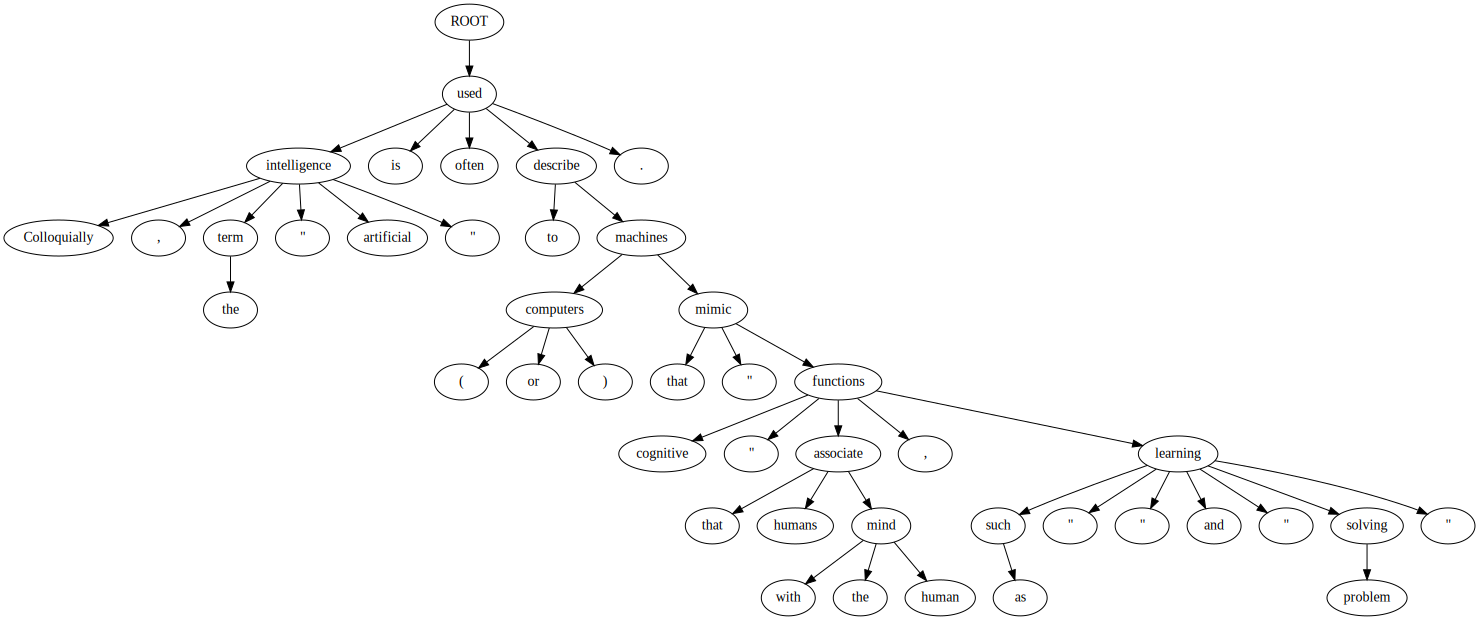

In [21]:
from graphviz import Digraph

def draw_tree(sent_i):
    sent = read_text()[sent_i]
    dot = Digraph()
    for idx, token in enumerate(sent):
        dot.node(str(idx), token.text)
    for idx, token in enumerate(sent):
        if token.text == 'ROOT':
            continue
        dot.edge(str(token.head.idx), str(idx))
    
    # dot.render
    return dot

draw_tree(2)

### 45. Triple with subject, verb, and direct object
We are interested in extracting facts from the text. In this chapter, we represent a fact as a tuple of (subject, predicate, object). Extract tuples from dependency trees where:

- subject is a nominal subject of a verb in the past tense
- predicate is the verb in the past tense
- object is a direct object of the verb

Consider an example sentence, "Frank Rosenblatt invented the perceptron". We want to extract a tuple, (Rosenblatt, invented, perceptron), from the sentence. In this problem, we only consider a subject and object as a single word.

This graph shows a dependency tree for the sentence (this may vary depending on the parser).

![svo](image/svo.png)

In order to extract a tuple from a dependency tree, it may be a good idea to design an extraction rule on the dependency tree, for example,
$$
\{ {\rm subject} \} \xleftarrow{\rm nsubj} \{ {\rm predicate\}_{\tt pos=VBD}} \xrightarrow{\rm dobj} \{ {\rm object} \}
$$

### 46. Expanding subjects and objects
Improve the program of Problem 45 to remove the restriction that subjects and objects are single words but can also be phrases. For example, we want to extract (Frank Rosenblatt, invented, perceptron) from the sentence, "Frank Rosenblatt invented the perceptron".

### 47. Triple from the passive sentence
Extract facts from sentences in the passive voice. Consider an example sentence, "Artificial intelligence was founded as an academic discipline in 1955". We want to extract two tuples from the sentence,

- (Artificial intelligence, founded-as, academic discipline)
- (Artificial intelligence, founded-in, 1955)

### 48. Extract paths from the root to nouns
For every noun in a dependency tree, extract a path from the root to the noun. Here, each path must satisfy the following specifications.

- Nodes in a path are words in surface form
- Nodes are connected with " -> " from the root to the leaf node
- We don't have to include dependency types (e.g., nsubj, dobj) when representing a dependency path.

For the example sentence, "Frank Rosenblatt invented the perceptron", we expect an output,
```
invented -> Rosenblatt
invented -> Rosenblatt -> Frank
invented -> perceptron
```

### 49. Extract the shortest path between two nouns
Extract the shortest path for every pair of two nouns. Supposing that two nouns appear at the i-th and j-th positions (in words) in a sentence (i<j), the shortest path must satisfy the following specifications.

Nodes in a path are words in surface form
Nodes corresponding to the i-th and j-th words are replaced with X and Y, respectively.
Nodes are connected with either " -> " or " <- " from X to Y to represent a direction of a dependency.
We can consider two types of dependency paths.

When the j-th word appears on the path from the i-th word to the root: the path from the i-th word to the j-th word
When the i-th and j-th words have the common ancestor (the k-th word) in the dependency tree: the path from the i-th word to the k-th word connected with " <- ", followed by the path from the k-th word to the j-th word connected with " -> ".
For the example sentence, "Frank Rosenblatt invented the perceptron", we expect an output,
```
X <- Y
X <- invented -> Y
X <- Rosenblatt <- invented -> Y
```